<h1 align=center>Classificando imagens com redes neurais convolucionais profundas</h1>
<p align=center><img src=https://www.electricalelibrary.com/wp-content/uploads/2018/11/convolutional_neural_network.png></p>


Já analisamos detalhadamente diferentes aspectos da API do *TensorFlow*, você se familiarizou com tensores e funções de decoração e aprendeu a trabalhar com os estimadores do *TensorFlow*. Aqui você aprenderá agora sobre **redes neurais convolucionais (CNNs)** para classificação de imagens. Começaremos discutindo os blocos básicos de construção das CNNs, usando uma abordagem de baixo para cima. Em seguida, mergulharemos mais fundo na arquitetura CNN e exploraremos como implementar CNNs no *TensorFlow*.

### Os blocos de construção das CNNs
CNNs são uma família de modelos que foram originalmente inspirados em como o córtex visual do cérebro humano funciona ao reconhecer objetos. O desenvolvimento das CNNs remonta à década de 1990, quando *Yann LeCun* e seus colegas propuseram uma nova arquitetura RN para classificar dígitos manuscritos de imagens (Handwritten Digit Recognition with a Back-Propagation Network, Y. LeCun e outros, 1989, publicado no Conferência de Sistemas de Processamento de Informações Neurais (NeurIPS).

> ### O córtex visual humano
> A descoberta original de como o córtex visual do nosso cérebro funciona foi feita por David H. Hubel e Torsten Wiesel em 1959, quando inseriram um microeletrodo no córtex visual primário de um gato anestesiado. Então, eles observaram que os neurônios do cérebro respondem de maneira diferente depois de projetar diferentes padrões de luz na frente do gato. Isso acabou levando à descoberta das diferentes camadas do córtex visual. Enquanto a camada primária detecta principalmente bordas e linhas, camadas de ordem superior concentram-se mais na extração de formas e padrões complexos.

Devido ao excelente desempenho das CNNs para tarefas de classificação de imagens, esse tipo específico de RN *feedforward* ganhou muita atenção e levou a enormes melhorias no aprendizado de máquina para visão computacional. Vários anos depois, em 2019, *Yann LeCun* recebeu o prêmio *Turing* (o prêmio de maior prestígio em ciência da computação) por suas contribuições ao campo da Inteligência Artificial (IA), juntamente com outros dois pesquisadores, *Yoshua Bengio e Geoffrey Hinton*.

A seguir, discutiremos o conceito mais amplo de RNs e por que as arquiteturas convolucionais são frequentemente descritas como **camadas de extração de recursos**. Em seguida, aprofundaremos a definição teórica do tipo de operação de convolução que é comumente usada em CNNs e percorreremos exemplos para calcular convoluções em uma e duas dimensões.

### Entendendo as CNNs e as hierarquias de recursos

A extração bem-sucedida de **recursos salientes (relevantes)** é fundamental para o desempenho de qualquer algoritmo de aprendizado de máquina e os modelos tradicionais de aprendizado de máquina dependem de recursos de entrada que podem vir de um especialista de domínio ou são baseados em técnicas computacionais de extração de recursos.

Certos tipos de RNs, como CNNs, são capazes de aprender automaticamente os recursos de dados brutos que são mais úteis para uma tarefa específica. Por esse motivo, é comum considerar as camadas CNN como extratores de recursos: as camadas iniciais (aquelas logo após a camada de entrada) extraem **características de baixo nível** de dados brutos e as camadas posteriores (geralmente, **camadas totalmente conectadas** como em um perceptron multicamada (*MLP*)) usa esses recursos para prever um valor de destino contínuo ou rótulo de classe.

Certos tipos de RNs multicamadas e, em particular, RNs convolucionais profundos (CNNs), constroem a chamada **hierarquia de recursos** combinando os recursos de baixo nível em uma forma de camada para formar recursos de alto nível. Por exemplo, se estamos lidando com imagens, os recursos de baixo nível, como bordas e bolhas, são extraídos das camadas anteriores, que são combinadas para formar recursos de alto nível. Esses recursos de alto nível podem formar formas mais complexas, como os contornos gerais de objetos como prédios, gatos ou cachorros.

Como você pode ver na imagem a seguir, uma CNN calcula mapas de recursos de uma imagem de entrada, onde cada elemento vem de um patch local de pixels na imagem de entrada:

<img src=https://miro.medium.com/max/1000/1*z7hd8FZeI_eodazwIapvAw.png>

Este patch local de pixels é referido como o **campo receptivo local**. As CNNs geralmente têm um desempenho muito bom em tarefas relacionadas à imagem, e isso se deve em grande parte a duas ideias importantes:
* **Conectividade esparsa**: Um único elemento no mapa de recursos é conectado a apenas um pequeno trecho de pixels. (Isto é muito diferente de conectar-se a toda a imagem de entrada como no caso dos perceptrons)
* **Compartilhamento de parâmetros**: Os mesmos pesos são usados ​​para diferentes patches da imagem de entrada.

Como consequência direta dessas duas ideias, substituir um *MLP* convencional totalmente conectado por uma camada de convolução **diminui substancialmente** o número de pesos (parâmetros) na rede e veremos uma melhoria na capacidade de capturar recursos salientes. No contexto de dados de imagem, faz sentido supor que pixels próximos são tipicamente mais relevantes entre si do que pixels distantes.

Normalmente, as CNNs são compostas por várias camadas convolucionais e de subamostragem que são seguidas por uma ou mais camadas totalmente conectadas no final. As camadas totalmente conectadas são essencialmente um *MLP*, onde cada unidade de entrada, $\small i$, está conectada a cada unidade de saída, $\small j$, com peso $\small w_{ij}$.

Observe que as camadas de subamostragem, comumente conhecidas como **camadas de agrupamento** (*pooling layers*), não possuem parâmetros que podem ser aprendidos; por exemplo, não há pesos ou unidades de polarização nas **camadas de agrupamento**. No entanto, ambas as camadas convolucional e totalmente conectada têm pesos e vieses que são otimizados durante o treinamento.

Nas seções a seguir, estudaremos as camadas convolucionais e de *pooling* com mais detalhes e veremos como elas funcionam. Para entender como as operações de convolução funcionam, vamos começar com uma convolução em uma dimensão, que às vezes é usada para trabalhar com certos tipos de dados de sequência, como texto. Depois de discutir as convoluções unidimensionais, trabalharemos com as convoluções bidimensionais típicas que são comumente aplicadas a imagens bidimensionais. 

### Executando convoluções discretas

Uma **convolução discreta** (ou simplesmente convolução) é uma operação fundamental em uma CNN. Portanto, é importante entender como essa operação funciona. Abordaremos a definição matemática e discutiremos alguns dos algoritmos ingênuos para calcular convoluções de tensores unidimensionais (vetores) e tensores bidimensionais (matrizes).

Observe que as fórmulas e descrições nesta seção são apenas para entender como funcionam as operações de convolução nas CNNs. De fato, implementações muito mais eficientes de operações convolucionais já existem em pacotes como o *TensorFlow*, como você verá mais adiante.

### Convoluções discretas em uma dimensão
Vamos começar com algumas definições e notações básicas que vamos usar. Uma convolução discreta para dois vetores, $\small x$ e $\small w$, é denotada por $y = x \times w$ , em que o vetor x é nossa entrada (às vezes chamado de **signal**) e $\small w$ é chamado de **filter** ou **kernel**. Uma convolução discreta é definida matematicamente da seguinte forma:

$$
y = x \times w \to y[i] = \sum^{+ \infty}_{k=-\infty}x[i-k]w[k]
$$

Os colchetes, $[ \: ]$ , são usados ​​para denotar a indexação de elementos vetoriais. O índice, $\small i$, percorre cada elemento do vetor de saída, $\small y$. Há duas coisas estranhas na fórmula anterior que precisamos esclarecer: $−\infty$ a $+\infty$ índices e indexação negativa para $\small x$.
O fato de a soma percorrer índices de $−\infty$ a $+\infty$ parece estranho, principalmente porque em aplicações de aprendizado de máquina, sempre lidamos com vetores de características finitos. Por exemplo, se $\small x$ tem 10 traços com índices 0, 1, 2,…, 8, 9, então os índices $−\infty$∶ −1 e 10 ∶ $+\infty$ estão fora dos limites para $\small x$. Portanto, para calcular corretamente a soma mostrada na fórmula anterior, assume-se que $\small x$ e $\small w$ são preenchidos com zeros. Isso resultará em um vetor de saída, $\small y$, que também tem tamanho infinito, com muitos zeros também. Como isso não é útil em situações práticas, $\small x$ é preenchido apenas com um número finito de zeros.

Esse processo é chamado de **zero-padding** (preenchimento zero) ou simplesmente **padding**. Aqui, o número de zeros preenchidos em cada lado é denotado por $\small p$. Um exemplo de preenchimento de um vetor unidimensional, $\small x$, é mostrado na figura a seguir:

![](https://img-blog.csdnimg.cn/20200905045036227.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L0xpbmxpNTIyMzYyMjQy,size_16,color_FFFFFF,t_70)

Vamos supor que a entrada original, $\small x$, e o filtro, $\small w$, tenham `n` e `m` elementos, respectivamente, onde $\small  m \leq n$ . Portanto, o vetor preenchido, $\small x^p$ , tem tamanho $\small n + 2p$. A fórmula prática para calcular uma convolução discreta mudará para o seguinte:

$$
y = x \times w \to y[i] = \sum^{k=m-1}_{k=0}x^{p}[i+m-k]w[k]
$$

Agora que resolvemos o problema do índice infinito, o segundo problema é indexar $\small x$ com $\small i + m – k$. O ponto importante a ser observado aqui é que $\small x$ e $\small w$ são indexados em direções diferentes nessa soma. Calcular a soma com um índice indo na direção inversa é equivalente a calcular a soma com ambos os índices na direção direta depois de inverter um desses vetores, $\small x$ ou $\small w$, depois de serem preenchidos. Então, podemos simplesmente calcular seu produto escalar. Vamos supor que viramos (giramos) o filtro, $\small w$, para obter o filtro girado, $\small w^r$. Então, o produto escalar, $\small x[i:i+m]$. $\small w^r$, é calculado para obter um elemento, $\small y[i]$, onde $\small x[i: i + m]$ é um patch de $\small x$ com tamanho $small m$. Esta operação é repetida como em uma abordagem de janela deslizante para obter todos os elementos de saída. A figura a seguir fornece um exemplo com $\small x = [3 \: 2\: 1\: 7\: 1\: 2\: 5\: 4]$ e $\small w = [\dfrac{1}{2} \: \dfrac{3}{4} \: 1\:  \dfrac{1}{4}]$ para que os três primeiros elementos de saída sejam calculados:

![](https://img-blog.csdnimg.cn/20200906095751465.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L0xpbmxpNTIyMzYyMjQy,size_16,color_FFFFFF,t_70)

Você pode ver no exemplo anterior que o tamanho do preenchimento é zero ($\small p = 0$). Observe que o filtro girado, $\small w^r$ , é deslocado em duas células cada vez que deslocamos (**shift**). Esse deslocamento é outro hiperparâmetro de uma convolução, o **stride** (passo), $\small s$. Neste exemplo, o passo é dois, $\small s = 2$. Observe que o passo deve ser um número positivo menor que o tamanho do vetor de entrada. Falaremos mais sobre *padding* e *strides* posteriomente.

### Preenchimento de entradas para controlar o tamanho dos mapas de recursos de saída
Até agora, usamos apenas *zero-padding* em convoluções para calcular vetores de saída de tamanho finito. Tecnicamente, o preenchimento pode ser aplicado com qualquer $\small p \geq 0$ . Dependendo da escolha de $\small p$, as células limítrofes podem ser tratadas de forma diferente das células localizadas no meio de $\small x$.

Agora, considere um exemplo onde $\small n = 5$ e $\small m = 3$. Então, com $\small p=0$, $\small x[0]$ é usado apenas no cálculo de um elemento de saída (por exemplo, $\small y[0]$), enquanto $\small x[1]$ é usado no cálculo de dois elementos de saída (por exemplo, $\small y[0]$ e $\small y[1]$). Então, você pode ver que esse tratamento diferente dos elementos de $\small x$ pode colocar artificialmente mais ênfase no elemento do meio, $\small x[2]$, já que ele apareceu na maioria dos cálculos. Podemos evitar esse problema se escolhermos $\small p = 2$, caso em que cada elemento de $\small x$ estará envolvido no cálculo de três elementos de $\small y$.

Além disso, o tamanho da saída, $\small y$, também depende da escolha da estratégia de preenchimento que usamos.

Existem três modos de preenchimento que são comumente usados na prática: *full* (completo), *same* (igual) e *valid* (válido):
* No modo *full*, o parâmetro de *padding*, $\small p$, é definido como $\small p = m – 1$. O preenchimento *full* aumenta as dimensões da saída; assim, <u>raramente é usado em arquiteturas CNN</u>.
* O *Same* preenchimento geralmente é usado para garantir que o vetor de saída tenha o mesmo tamanho que o vetor de entrada, $\small x$. Nesse caso, o parâmetro de preenchimento, $\small p$, é calculado de acordo com o tamanho do filtro, juntamente com o requisito de que o tamanho de entrada e o tamanho de saída sejam os mesmos.
* Finalmente, computar uma convolução no modo *valid* refere-se ao caso em que $\small p = 0$ (sem *padding*).

![](imagens\padding.PNG)

O modo de preenchimento mais usado em CNNs é o *SAME PADDING*. Uma de suas vantagens sobre os outros modos de preenchimento é que o *Same Padding* preserva o tamanho do vetor - ou a altura e a largura das imagens de entrada quando estamos trabalhando em tarefas relacionadas a imagens em visão computacional - o que torna o projeto de uma arquitetura de rede mais conveniente.

Uma grande desvantagem do *valid padding* versus preenchimento *full* e *same*, por exemplo, é que o volume dos tensores diminuirá substancialmente em RNs com muitas camadas, o que pode prejudicar o desempenho da rede.

Na prática, é recomendável preservar o tamanho espacial usando o mesmo preenchimento para as camadas convolucionais e, em vez disso, diminuir o tamanho espacial por meio de camadas de *pooling*. Quanto ao *padding full*, seu tamanho resulta em uma saída maior que o tamanho da entrada. O *padding full* é geralmente usado em aplicações de **processamento de sinal** onde é importante minimizar os efeitos de contorno. No entanto, no contexto de aprendizado profundo, os efeitos de limite geralmente não são um problema, portanto, raramente vemos o *padding full* sendo usado na prática.


### Determinando o tamanho da saída de convolução

O tamanho de saída de uma convolução é determinado pelo número total de vezes que deslocamos o filtro, $\small w$, ao longo do vetor de entrada. Vamos supor que o vetor de entrada seja de tamanho $\small n$ e o filtro seja de tamanho $\small m$. Então, o tamanho da saída resultante de $y = x \: * \: w$, com *padding*, $\small p$, e *stride*, $\small s$, seria determinado da seguinte forma:

$$
o = [\dfrac{n + 2p - m}{s}] + 1
$$

Aqui, $[\:]$ denota a *floor operation*.

> #### A operação de piso (*floor operation*)
> A operação de piso retorna o maior inteiro igual ou menor que a entrada, por exemplo:
> $$
\small floor(1.77) = [1.77] = 1
$$

Considere os dois casos a seguir:
* Calcular o tamanho de saída para um vetor de entrada de tamanho 10 com um kernel de convolução de tamanho 5, *padding* 2 e *stride* 1:
$$\small 
n = 10,m=5, \quad p=2, \quad s = 1 \to o = [\dfrac{10 +  2 \times 2 -5}{1}] + 1 = 10
$$

(Observe que, neste caso, o tamanho da saída acaba sendo o mesmo que a entrada; portanto, podemos concluir que este é o smodo *same-padding*.)

* Como o tamanho da saída muda para o mesmo vetor de entrada quando tem um kernel de tamanho 3 e *stride* 2?
$$\small 
n = 10,m=3, \quad p=2, \quad s = 2 \to o = [\dfrac{10 +  2 \times 2 -3}{2}] + 1 = 6
$$

Finalmente, para aprender a calcular convoluções em uma dimensão, uma implementação ingênua é mostrada no bloco de código a seguir e os resultados são comparados com a função `numpy.convolve`. O código é o seguinte:

In [60]:
import tensorflow as tf
import numpy as np

import warnings
warnings.filterwarnings("ignore")

print('TensorFlow version:', tf.__version__)
print('NumPy version: ', np.__version__)

TensorFlow version: 2.8.0
NumPy version:  1.21.5


In [61]:
def conv1d(x, w, p=0, s=1):
    w_rot = np.array(w[::-1])
    x_padded = np.array(x)
    if p > 0:
        zero_pad = np.zeros(shape=p)
        x_padded = np.concatenate(
            [zero_pad, x_padded, zero_pad])
    res = []
    for i in range(0, int((len(x_padded) - len(w_rot)) / s) + 1, s):
        res.append(np.sum(
            x_padded[i:i+w_rot.shape[0]] * w_rot))
    return np.array(res)


## Testing:
x = [1, 3, 2, 4, 5, 6, 1, 3]
w = [1, 0, 3, 1, 2]

print('Conv1d Implementation:',
      conv1d(x, w, p=2, s=1))

print('Numpy Results:',
      np.convolve(x, w, mode='same')) 

Conv1d Implementation: [ 5. 14. 16. 26. 24. 34. 19. 22.]
Numpy Results: [ 5 14 16 26 24 34 19 22]


Até agora, nos concentramos principalmente em convoluções para vetores (convoluções 1D). Começamos com o caso 1D para tornar os conceitos mais fáceis de entender. Na próxima seção, abordaremos as convoluções 2D com mais detalhes, que são os blocos de construção das CNNs para tarefas relacionadas a imagens.

### Executando uma convolução discreta em 2D
Os conceitos que você aprendeu nas seções anteriores são facilmente extensíveis para 2D. Quando lidamos com entradas 2D, como uma matriz, $\small X_{n_1 \times n_2}$ e a matriz do filtro, $\small X_{m_1 \times m_2}$, onde $\small m_1 \leq n_1$ e $\small m_2\leq n_2$, então a matriz $\small Y = X \: * W$ é o resultado de uma convolução 2D entre $\small X$ e $\small W$. Isso é definido matematicamente da seguinte forma:

$$\small 
Y = X \: * \: W \to Y[i,j] = \sum^{+ \infty}_{k_1=-\infty} \sum^{+ \infty}_{k_2=-\infty} X[i - k_1, j - k_2]W[k_1,k_2]
$$

Observe que se você omitir uma das dimensões, a fórmula restante é exatamente a mesma que usamos anteriormente para calcular a convolução em 1D. De fato, todas as técnicas mencionadas anteriormente, como *zero-padding*, rotação da matriz do filtro e uso de *strides*, também são aplicáveis às convoluções 2D, desde que sejam estendidas para ambas as dimensões de forma independente. A figura a seguir demonstra a convolução 2D de uma matriz de entrada de tamanho $\small 8 \times 8$ , usando um kernel de tamanho $\small 3 \times 3$. A matriz de entrada é preenchida com zeros com $\small p = 1$. Como resultado, a saída da convolução 2D terá um tamanho de $\small 8 × 8$:

![](imagens\CNN2D.PNG)

O exemplo a seguir ilustra o cálculo de uma convolução 2D entre uma matriz de entrada, $\small X_{3 \times 3}$, e uma matriz kernel, $\small W_{3 \times 3}$, usando *padding* $\small p = (1, 1)$ e *stride* $\small s = (2, 2)$. De acordo com o preenchimento especificado, uma camada de zeros é adicionada em cada lado da matriz de entrada, o que resulta na matriz preenchida $\small X^{padded}_{5 \times 5}$, como segue:

![](imagens\padded.PNG)

Com o filtro anterior, o filtro girado será:

$$
W^r = \begin{bmatrix}
0.5 & 1 & 0.5 \\
0.1 & 0.4 & 0.3 \\
0.4 & 0.7 & 0.5
\end{bmatrix}
$$

Observe que essa rotação não é a mesma que a matriz de transposição. Para obter o filtro girado no *NumPy*, podemos escrever `W_rot=W[::-1,::-1]`. Em seguida, podemos deslocar a matriz de filtro girada ao longo da matriz de entrada preenchida, $X^{padded}$ , como uma janela deslizante e calcular a soma do produto elemento a elemento, que é denotado pelo operador $\odot$ na figura a seguir:

![](imagens\x_padded.PNG)

O resultado será a matriz $\: \small 2 \times 2$, $\small Y$.

Vamos também implementar a convolução 2D de acordo com o algoritmo ingênuo descrito. O pacote `scipy.signal` fornece uma maneira de calcular a convolução 2D por meio da função `scipy.signal.convolve2d`:

In [62]:
import scipy.signal


def conv2d(X, W, p=(0, 0), s=(1, 1)):
    W_rot = np.array(W)[::-1,::-1]
    X_orig = np.array(X)
    n1 = X_orig.shape[0] + 2*p[0]
    n2 = X_orig.shape[1] + 2*p[1]
    X_padded = np.zeros(shape=(n1, n2))
    X_padded[p[0]:p[0]+X_orig.shape[0],
    p[1]:p[1]+X_orig.shape[1]] = X_orig

    res = []
    for i in range(0, int((X_padded.shape[0] - 
                           W_rot.shape[0])/s[0])+1, s[0]):
        res.append([])
        for j in range(0, int((X_padded.shape[1] - 
                               W_rot.shape[1])/s[1])+1, s[1]):
            X_sub = X_padded[i:i+W_rot.shape[0],
                             j:j+W_rot.shape[1]]
            res[-1].append(np.sum(X_sub * W_rot))
    return(np.array(res))

X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]

print('Conv2d Implementation:\n',
    conv2d(X, W, p=(1, 1), s=(1, 1)))


print('\nSciPy Results:\n',
    scipy.signal.convolve2d(X, W, mode='same'))

Conv2d Implementation:
 [[11. 25. 32. 13.]
 [19. 25. 24. 13.]
 [13. 28. 25. 17.]
 [11. 17. 14.  9.]]

SciPy Results:
 [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]


> #### Algoritmos eficientes para computação de convolução
> Fornecemos uma implementação ingênua para calcular uma convolução 2D com o objetivo de entender os conceitos. No entanto, esta implementação é muito ineficiente em termos de requisitos de memória e complexidade computacional. Portanto, ele não deve ser usado em aplicativos de RN do mundo real. Um aspecto é que a matriz do filtro não é girada na maioria das ferramentas como o *TensorFlow*. Além disso, nos últimos anos, foram desenvolvidos algoritmos muito mais eficientes que usam a *transformada de Fourier* para calcular as convoluções. Também é importante observar que, no contexto das RNs, o tamanho de um kernel de convolução geralmente é **muito menor que o tamanho da imagem de entrada**.
>
> Por exemplo, CNNs modernas geralmente usam tamanhos de kernel como `1 × 1` , `3 × 3` ou `5 × 5`, para os quais foram projetados algoritmos eficientes que podem realizar as operações convolucionais com muito mais eficiência, como o algoritmo de filtragem mínima de *Winograd*.

### Camadas de subamostragem
A subamostragem é normalmente aplicada em duas formas de operações de *pooling* em CNNs: **max-pooling** e **mean-pooling** (também conhecido como **average-pooling**). A camada de agrupamento é geralmente denotada por $\small p_{n_1 \times n_2}$. Aqui, o subscrito determina o tamanho da vizinhança (o número de pixels adjacentes em cada dimensão) onde a operação máxima ou média é realizada. Referimo-nos a essa vizinhança como o tamanho do pool.

A operação é descrita na figura a seguir. No caso, *max-pooling* pega o **valor máximo** de uma vizinhança de pixels, e o *mean-pooling* calcula sua **média**:

![](imagens\pooling.PNG)

A vantagem do *pooling* é dupla:
* *Pooling* (*max-pooling*) introduz uma invariância local. Isso significa que pequenas mudanças em uma vizinhança local não alteram o resultado do *max-pooling*.

Portanto, ajuda na geração de recursos que são mais robustos ao ruído nos dados de entrada. Consulte o exemplo a seguir, que mostra que o *max-pooling* de duas matrizes de entrada diferentes, $\small X_1$ e $\small X_2$ , resulta na mesma saída:

![](imagens\matriz_pooling.PNG)

O agrupamento diminui o tamanho dos recursos, o que resulta em **maior eficiência computacional**. Além disso, reduzir o número de recursos também pode reduzir o grau de *overfitting*.

> ##### *Pooling* sobreposto versus não sobreposto
>Tradicionalmente, o *pooling* é assumido como não sobreposto. O *pooling* é normalmente executado em vizinhanças não sobrepostas, o que pode ser feito definindo o parâmetro stride igual ao tamanho do *pooling*.
>
> Por exemplo, uma camada de agrupamento não sobreposta, $p_{n_1 \times n_2}$, requer um parâmetro de passada $\small s = (n_1,n_2)$ . Por outro lado, o agrupamento sobreposto ocorre se o *stride* for menor que o tamanho do agrupamento. Um exemplo em que o *pooling* sobreposto é usado em uma rede convolucional é descrito em *ImageNet Classification with Deep Convolutional Neural Networks*.

Embora o *pooling* ainda seja uma parte essencial de muitas arquiteturas CNN, várias arquiteturas CNN também foram desenvolvidas sem o uso de camadas de *pooling*. Em vez de usar camadas de *pooling* para reduzir o tamanho do recurso, os pesquisadores usam camadas convolucionais com um *stride* de 2. De certa forma, você pode pensar em uma camada convolucional com *stride* 2 como uma camada de *pooling* com pesos aprendíveis. 

### Juntando tudo – implementando uma CNN
Até agora, você aprendeu sobre os blocos básicos de construção das CNNs. Os conceitos ilustrados não são realmente mais difíceis do que as RNs multicamadas tradicionais. Podemos dizer que a operação mais importante em uma RN tradicional é a multiplicação de matrizes. Por exemplo, usamos multiplicações de matrizes para calcular as pré-ativações (ou entradas líquidas), como em $\small z = Wx +b$. Aqui, $\small x$ é um vetor coluna (matriz $\mathbb{R}^{n \times 1}$) representando pixels e $\small W$ é a matriz de peso que conecta as entradas de pixel a cada unidade oculta.

Em uma CNN, esta operação é substituída por uma operação de convolução, como em $\small Z = W \:*\: X  + b$, onde $\small X$ é uma matriz que representa os pixels em um arranjo $\small heigth \times width$. Em ambos os casos, as pré-ativações são passadas para uma função de ativação para obter a ativação de uma unidade oculta, $\small A = \phi(Z)$, onde $\small \phi$ é a função de ativação. Além disso, você deve se lembrar de que a subamostragem é outro bloco de construção de uma CNN, que pode aparecer na forma de *pooling*, conforme descrito na seção anterior.

### Trabalhando com vários canais de entrada ou de cores

Uma entrada para uma camada convolucional pode conter uma ou mais matrizes ou matrizes 2D com dimensões $\small N_1 \times N_2$ (por exemplo, a altura e a largura da imagem em pixels). Essas matrizes $\small N_1 \times N_2$ são chamadas de canais. Implementações convencionais de camadas convolucionais esperam uma representação de tensor de nível 3 como entrada, por exemplo, uma matriz tridimensional, $\small X_{n_1 \times N_2 \times C_{in}}$ , onde $\small C_{in}$ é o número de canais de entrada. Por exemplo, vamos considerar imagens como entrada para a primeira camada de uma CNN. Se a imagem for colorida e usar o modo de cor RGB, então $\small C_{in}$ = 3 (para os canais de cores vermelho, verde e azul em RGB). No entanto, se a imagem estiver em tons de cinza, então temos $C_{in}$ = 1, pois há apenas um canal com os valores de intensidade de pixel em tons de cinza.

> #### Lendo um arquivo de imagem
> Quando trabalhamos com imagens, podemos ler imagens em *arrays NumPy* usando o tipo de dados `uint8` (unsigned 8-bit integer) para reduzir o uso de memória em comparação com tipos inteiros de 16 bits, 32 bits ou 64 bits, por exemplo.
>
> Inteiros de 8 bits sem sinal assumem valores no intervalo [0, 255], que são suficientes para armazenar as informações de pixel em imagens RGB, que também assumem valores no mesmo intervalo.
> 
> O *TensorFlow* fornece um módulo para carregar/armazenar e manipular imagens por meio dos submódulos `tf.io` e `tf.image`. Vamos recapitular como ler uma imagem:

In [63]:
import tensorflow as tf
img_raw = tf.io.read_file("imagens\passaro-cantando.jpg")
img = tf.image.decode_image(img_raw)
print(f"Image_shape: {img.shape}")

Image_shape: (550, 1000, 3)


Ao criar modelos e carregadores de dados no *TensorFlow*, é recomendável usar `tf.image `também para ler as imagens de entrada.

Agora, vamos ver também um exemplo de como podemos ler uma imagem em nossa sessão *Python* usando o pacote `imageio`.

In [64]:
import imageio
img = imageio.imread("imagens\passaro-cantando.jpg")
print(f"Image shape: {img.shape}")
print()
print(f"Number of Channels: {img.shape[2]}")
print()
print(f"Image data type: {img.dtype}")
print()
print(img[100:102, 100:102, :])

Image shape: (550, 1000, 3)

Number of Channels: 3

Image data type: uint8

[[[100 116 103]
  [100 116 103]]

 [[100 116 103]
  [100 116 103]]]


Agora que você está familiarizado com a estrutura dos dados de entrada, a próxima pergunta é: como podemos incorporar vários canais de entrada na operação de convolução que discutimos nas seções anteriores? A resposta é muito simples: realizamos a operação de convolução para cada canal separadamente e depois somamos os resultados usando a soma da matriz. A convolução associada a cada canal (`c`) tem sua própria matriz kernel como `W[:, :, c]`. O resultado total da pré-ativação é calculado na seguinte fórmula:

![](imagens\conv_c.PNG)

O resultado final, $\small A$, é um mapa de características. Normalmente, uma camada convolucional de uma CNN possui mais de um mapa de *features*. Se usarmos vários mapas de *features*, o tensor do kernel se tornará quadridimensional: $\small width \times height \times C_{in} \times C_{out}$. Aqui, $\small width \times height$ é o tamanho do kernel, $\small C_{in}$ é o número de canais de entrada e $\small C_{out}$ é o número de mapas de *features* de saída. Então, agora vamos incluir o número de mapas de *features* de saída na fórmula anterior e atualizá-lo, da seguinte forma:

![](imagens\conv_c_atu.PNG)

Para concluir nossa discussão sobre convoluções de computação no contexto de RNs, vejamos o exemplo na figura a seguir, que mostra uma camada convolucional, seguida por uma camada de agrupamento. Neste exemplo, existem três canais de entrada. O tensor do kernel é quadridimensional. Cada matriz kernel é denotada como $\small m_1 \times m_2$, e existem três delas, uma para cada canal de entrada. Além disso, existem cinco desses kernels, representando cinco mapas de *features* de saída. Finalmente, há uma camada de agrupamento para subamostragem dos mapas de *features*:

![](imagens\conv_mapa.PNG)

> #### Quantos parâmetros treináveis ​​existem no exemplo anterior?
> Para ilustrar as vantagens de convolução, **compartilhamento de parâmetros** e **conectividade esparsa**, vamos trabalhar com um exemplo. A camada convolucional na rede mostrada na figura anterior é um tensor de quatro dimensões. Então, existem $\small m_1 \times m_2 \times 3 \times 5$ parâmetros associados ao kernel. Além disso, há um vetor de polarização para cada mapa de *features* de saída da camada convolucional. Assim, o tamanho do vetor de polarização é $\small 5$. As camadas de agrupamento não possuem nenhum parâmetro (treinável); portanto, podemos escrever o seguinte:
>$$
\small m_1 \times m_2 \times 3 \times 5 + 5
>$$
> Se o tensor de entrada for de tamanho $\small n_1 \times n_2 \times 3$, supondo que a convolução seja realizada com o modo de *same-padding*, os mapas de *features* de saída seriam de tamanho $\small n_1 \times n_2 \times 5$ .
>
> Observe que se usarmos uma camada totalmente conectada em vez de uma camada convolucional, esse número será muito maior. No caso de uma camada totalmente conectada, o número de parâmetros para que a matriz de pesos atinja o mesmo número de unidades de saída seria o seguinte:
>$$
\small (n_1 \times n_2 \times 3) \times (n_1 \times n_2 \times 5) = (n_1 \times n_2)^2 \times 3 \times 5
>$$
> Além disso, o tamanho do vetor de polarização é $\small n_1 \times n_2 \times 5$ (um elemento de polarização para cada unidade de saída). Dado que $\small m_1 < n_1$ e $m_2<n_2$, podemos ver que a diferença no número de parâmetros treináveis ​​é significativa.

Por fim, como já foi mencionado, tipicamente, as operações de convolução são realizadas tratando uma imagem de entrada com múltiplos canais de cores como uma pilha de matrizes; ou seja, realizamos a convolução em cada matriz separadamente e depois somamos os resultados, conforme ilustrado na figura anterior. No entanto, as convoluções também podem ser estendidas para volumes 3D se você estiver trabalhando com conjuntos de dados 3D.

### Regularizando uma RN com *dropout*

Escolher o tamanho de uma rede, seja uma RN tradicional (totalmente conectada) ou uma CNN, sempre foi um problema desafiador. Por exemplo, o tamanho de uma matriz de peso e o número de camadas precisam ser ajustados para obter um desempenho razoavelmente bom. Você deve se lembrar que uma rede simples sem nenhuma camada oculta só poderia capturar um limite de decisão linear, o que não é suficiente para lidar com um problema exclusivo ou (`XOR`) ou similar. A **capacidade** de uma rede refere-se ao nível de complexidade da função que ela pode aprender a aproximar. Redes pequenas, ou redes com um número relativamente pequeno de parâmetros, têm uma capacidade baixa e, portanto, são passíveis de *underfit*, resultando em desempenho ruim, uma vez que não podem aprender a estrutura subjacente de conjuntos de dados complexos. No entanto, redes muito grandes podem resultar em *overfitting*, onde a rede memorizará os dados de treinamento e se sairá extremamente bem no conjunto de dados de treinamento, enquanto obtém um desempenho ruim no conjunto de dados de teste mantido. Quando lidamos com problemas de aprendizado de máquina do mundo real, não sabemos a priori o tamanho da rede.

Uma maneira de resolver esse problema é construir uma rede com uma capacidade relativamente grande (na prática, queremos escolher uma capacidade um pouco maior do que o necessário) para se sair bem no conjunto de dados de treinamento. Então, para evitar *overfitting*, podemos aplicar um ou vários esquemas de regularização para obter um bom desempenho de generalização em novos dados, como o conjunto de dados de teste retido.

A técnica de regularização `L1` e `L2`, podem prevenir ou reduzir o efeito do *overfitting* adicionando uma penalidade à perda que resulta na redução dos parâmetros de peso durante o treinamento. Embora a regularização `L1` e `L2` também possa ser usada para RNs, sendo `L2` a escolha mais comum dos dois, existem outros métodos para regularizar RNs, como *dropout*, que discutiremos nesta seção. Mas antes de passarmos a discutir o *dropout*, para usar a regularização `L2` dentro de uma rede convolucional ou totalmente conectada (densa), você pode simplesmente adicionar a penalidade `L2` à função de perda definindo o `kernel_regularizer` de uma camada específica ao usar a API *Keras*, como segue (ele modificará automaticamente a função de perda):

In [65]:
from tensorflow import keras
conv_layer = keras.layers.Conv2D(
    filters=16,
    kernel_size=(3,3),
    kernel_regularizer=keras.regularizers.l2(0.001))

fc_layer = keras.layers.Dense(
    units=16,
    kernel_regularizer=keras.regularizers.l2(0.001))

Nos últimos anos, o *dropout* emergiu como uma técnica popular para regularizar (*deep*) RNs para evitar *overfitting*, melhorando assim o desempenho da generalização. O *dropout* geralmente é aplicado às unidades ocultas de camadas superiores e funciona da seguinte forma: durante a fase de treinamento de uma RN, uma fração das unidades ocultas é descartada aleatoriamente a cada iteração com probabilidade $\small p_{drop}$ (ou manter probabilidade $\small p_{keep} = 1 − p_{drop}$). Essa probabilidade de *dropout* é determinada pelo usuário e a escolha comum é $\small p = 0.5$. Ao descartar uma certa fração de neurônios de entrada, os pesos associados aos neurônios restantes são redimensionados para explicar os neurônios ausentes (descartados).

O efeito desse *dropout* aleatório é que a rede é forçada a aprender uma representação redundante dos dados. Portanto, a rede não pode contar com a ativação de nenhum conjunto de unidades ocultas, pois elas podem ser desligadas a qualquer momento durante o treinamento, sendo forçada a aprender padrões mais gerais e robustos a partir dos dados.

Este *dropout* aleatório pode efetivamente prevenir o *overfitting*. A figura a seguir mostra um exemplo de aplicação de *dropout* com probabilidade $\small p = 0.5$ durante a fase de treinamento, em que metade dos neurônios ficará inativa aleatoriamente (unidades descartadas são selecionadas aleatoriamente em cada passagem de treinamento). No entanto, durante a previsão, todos os neurônios contribuirão para computar as pré-ativações da próxima camada.

![](imagens\dropout.PNG)

Como mostrado aqui, um ponto importante a ser lembrado é que as unidades podem cair aleatoriamente apenas durante o treinamento, enquanto para a fase de avaliação (inferência), todas as unidades ocultas devem estar ativas (por exemplo, $p_{drop} = 0$ ou $p_{keep} = 1$). Para garantir que as ativações gerais estejam na mesma escala durante o treinamento e a previsão, as ativações dos neurônios ativos devem ser dimensionadas adequadamente (por exemplo, reduzindo pela metade a ativação se a probabilidade de *dropout* foi definida como $\small p = 0.5$).

No entanto, como é inconveniente sempre dimensionar as ativações ao fazer previsões, o *TensorFlow* e outras ferramentas dimensionam as ativações durante o treinamento (por exemplo, dobrando as ativações se a probabilidade de *dropout* foi definida como $\small p = 0.5$). Essa abordagem é comumente chamada de dropout inverso. Embora a relação não seja imediatamente óbvia, o *dropout* pode ser interpretado como o consenso (média) de um conjunto de modelos. No aprendizado conjunto, treinamos vários modelos independentemente. Durante a previsão, usamos o consenso de todos os modelos treinados. Já sabemos que conjuntos de modelos são conhecidos por terem um desempenho melhor do que modelos únicos. No aprendizado profundo, no entanto, treinar vários modelos e coletar e calcular a média da saída de vários modelos é computacionalmente caro. Aqui, o *dropout* oferece uma solução alternativa, com uma maneira eficiente de treinar muitos modelos de uma só vez e calcular suas previsões médias no tempo de teste ou previsão. 

Como mencionado anteriormente, a relação entre os conjuntos de modelos e o *dropout* não é imediatamente óbvia. No entanto, considere que no *dropout*, temos um modelo diferente para cada mini-lote (devido à definição dos pesos para zero aleatoriamente durante cada passagem para frente).

Então, por meio da iteração nos mini-lotes, essencialmente amostramos modelos $\small M = 2^h$, onde $\small h$ é o número de unidades ocultas.

A restrição e o aspecto que distingue a evasão do *ensembling* regular, no entanto, é que compartilhamos os pesos sobre esses "diferentes modelos", o que pode ser visto como uma forma de regularização. Então, durante a "inferência" (por exemplo, prevendo os rótulos no conjunto de dados de teste), podemos calcular a média de todos esses modelos diferentes que amostramos durante o treinamento. **Isso é muito custoso!**.

Então, calculando a média dos modelos, isto é, calculando a média geométrica da probabilidade de associação de classe que é retornada por um modelo, $\small i$, pode ser calculado da seguinte forma:

$$\small
p_{ensemble} = \left   [      \prod^M_{j=1}p^{\left \{ i \right \}}      \right ]^{ \dfrac{1}{M}}
$$

Agora, o truque por trás do *dropout* é que essa média geométrica dos conjuntos de modelos (aqui, $\small M$ modelos) pode ser aproximada escalando as previsões do último (ou final) modelo amostrado durante o treinamento por um fator de $\small 1/(1 – p)$, que é muito mais barato do que calcular a média geométrica explicitamente usando a equação anterior. (Na verdade, a aproximação é exatamente equivalente à verdadeira média geométrica se considerarmos modelos lineares.)

### Funções de perda para classificação
Provavelmente, você já viu diferentes funções de ativação, como `ReLU`, `sigmoid` e `tanh`. Algumas dessas funções de ativação, como `ReLU`, são usadas principalmente nas camadas intermediárias (ocultas) de uma RN para adicionar não linearidades ao nosso modelo. Mas outros, como `sigmoid` (para binário) e `softmax` (para multiclasse), são adicionados na última camada (saída), o que resulta em probabilidades de associação de classe como saída do modelo. Se as ativações `sigmoid` ou `softmax` não forem incluídas na camada de saída, o modelo calculará os `logits` em vez das probabilidades de associação de classe.

Focando nos problemas de classificação aqui, dependendo do tipo de problema (binário versus multiclasse) e do tipo de saída (logit versus probabilidades), devemos escolher a função de perda apropriada para treinar nosso modelo. A **Binary cross-entropy** (entropia cruzada binária) é a função de perda para uma classificação binária (com uma única unidade de saída), e a **categorical cross-entropy** (entropia cruzada categórica) é a função de perda para a classificação multiclasse. Na API *Keras*, são fornecidas duas opções para perda categórica de entropia cruzada, dependendo se os rótulos de verdade do terreno estão em um formato codificado *one-hot* (por exemplo, [0, 0, 1, 0]) ou fornecidos como inteiro rótulos (por exemplo, $\small y=2$), que também é conhecido como representação "esparsa" no contexto de *Keras*.

A tabela a seguir descreve três funções de perda disponíveis no *Keras* para lidar com todos os três casos: classificação binária, multiclasse com rótulos de verdade do solo codificados com um *hot* e multiclasse com rótulos inteiros (esparsos). Cada uma dessas três funções de perda também tem a opção de receber as previsões na forma de `logits` ou probabilidades de pertinência de classe:

![](imagens\tabela_loss.PNG)

Observe que calcular a perda de entropia cruzada fornecendo os *logits*, e não as probabilidades de associação de classe, geralmente é preferível devido a razões de estabilidade numérica. Se fornecermos *logits* como entradas para a função de perda e definir `from_logits=True`, a respectiva função do *TensorFlow* usará uma implementação mais eficiente para calcular a perda e a derivada da perda em relação aos pesos. Isso é possível porque certos termos matemáticos se cancelam e, portanto, não precisam ser calculados explicitamente ao fornecer *logits* como entradas.

O código a seguir mostrará como usar essas três funções de perda com dois formatos diferentes, onde as probabilidades de *logits* ou de associação de classe são fornecidas como entradas para as funções de perda:

In [66]:
import tensorflow_datasets as tfds
####### Binary Crossentropy
bce_probas = tf.keras.losses.BinaryCrossentropy(from_logits=False)
bce_logits = tf.keras.losses.BinaryCrossentropy(from_logits=True)

logits = tf.constant([0.8])
probas = tf.keras.activations.sigmoid(logits)

tf.print(
    'BCE (w Probas): {:.4f}'.format(
        bce_probas(y_true=[1], y_pred=probas)),
        '(w Logits): {:.4f}'.format(
            bce_logits(y_true=[1], y_pred=logits)))


BCE (w Probas): 0.3711 (w Logits): 0.3711


In [67]:
####### Categorical Crossentropy
cce_probas = tf.keras.losses.CategoricalCrossentropy(
    from_logits=False)
cce_logits = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True)

logits = tf.constant([[1.5, 0.8, 2.1]])
probas = tf.keras.activations.softmax(logits)

tf.print(
    'CCE (w Probas): {:.4f}'.format(
        cce_probas(y_true=[[0, 0, 1]], y_pred=probas)),
            '(w Logits): {:.4f}'.format(
                    cce_logits(y_true=[[0, 0, 1]], y_pred=logits)))

CCE (w Probas): 0.5996 (w Logits): 0.5996


In [68]:
####### Sparse Categorical Crossentropy
sp_cce_probas = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False)
sp_cce_logits = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True)

tf.print(
    'Sparse CCE (w Probas): {:.4f}'.format(
    sp_cce_probas(y_true=[[2]], y_pred=probas)),
    '(w Logits): {:.4f}'.format(
    sp_cce_logits(y_true=[[2]], y_pred=logits)))

Sparse CCE (w Probas): 0.5996 (w Logits): 0.5996


Observe que, às vezes, você pode encontrar uma implementação em que uma perda categórica de entropia cruzada é usada para classificação binária. Normalmente, quando temos uma tarefa de classificação binária, o modelo retorna um único valor de saída para cada exemplo. Interpretamos esta saída de modelo único como a probabilidade da classe positiva (por exemplo, *classe 1*), $\small P[classe = 1]$. Em um problema de classificação binária, está implícito que $\small P[class = 0] = 1 – P[class = 1]$; portanto, não precisamos de uma segunda unidade de saída para obter a probabilidade da classe negativa. No entanto, às vezes os praticantes optam por retornar duas saídas para cada exemplo de treinamento e interpretá-las como probabilidades de cada classe: $\small P[class = 0]\: versus \: P[class = 1]$. Então, nesse caso, é recomendado usar uma função *softmax* (em vez da sigmóide logística) para normalizar as saídas (que somam 1), e a entropia cruzada categórica é a função de perda apropriada.

### Implementando uma CNN profunda usando o *TensorFlow*

Você deve se lembrar de que usamos os estimadores do *TensorFlow* para problemas de reconhecimento de dígitos manuscritos, usando diferentes níveis de API do *TensorFlow*. Você também deve se lembrar de que alcançamos cerca de 89% de precisão usando o `DNNClassifier Estimator` com duas camadas ocultas.

Agora, vamos implementar uma CNN e ver se ela pode obter um melhor desempenho preditivo em comparação com o *MLP (DNNClassifier)* ​​para classificar dígitos manuscritos. Observe que as camadas totalmente conectadas tiveram um bom desempenho nesse problema. No entanto, em algumas aplicações, como a leitura de números de contas bancárias a partir de dígitos manuscritos, até mesmo pequenos erros podem ser muito caros. Portanto, é crucial reduzir esse erro o máximo possível.

### A arquitetura CNN multicamada

A arquitetura da rede que vamos implementar é mostrada na figura a seguir. As entradas são $\small 28 × 28$ imagens em tons de cinza. Considerando o número de canais (que é 1 para imagens em tons de cinza) e um lote de imagens de entrada, as dimensões do tensor de entrada serão $\small batchsize \times 28 \times 28 \times 1$.

Os dados de entrada passam por duas camadas convolucionais que possuem um tamanho de kernel de $\small 5 × 5$. A primeira convolução tem 32 mapas de *features* de saída e a segunda tem 64 mapas de *features* de saída. Cada camada de convolução é seguida por uma camada de subamostragem na forma de uma operação de agrupamento máximo, $\small P_{2\times2}$. Em seguida, uma camada totalmente conectada passa a saída para uma segunda camada totalmente conectada, que atua como a camada final de saída do *softmax*. A arquitetura da rede que vamos implementar é mostrada na figura a seguir:

![](imagens\arquitetura.PNG)

As dimensões dos tensores em cada camada são as seguintes:
* Input: [$\small batchsize \times 28 \times 28 \times 1$]
* Conv_1: [$\small batchsize \times 28 \times 28 \times 32$]
* Pooling_1: [$\small batchsize \times 14 \times 14 \times 32$]
* Conv_2: [$\small batchsize \times 14 \times 14 \times 64$]
* Pooling_2: [$\small batchsize \times 7 \times 7 \times 64$]
* FC_1: [$\small batchsize \times 1024$]
* Camada FC_2 e softmax: [$\small batchsize \times 10$]

Para os kernels convolucionais, estamos usando `strides=1` de modo que as dimensões de entrada sejam preservadas nos mapas de *features* resultantes. Para as camadas de agrupamento, estamos usando `strides=2` para subamostrar a imagem e reduzir o tamanho dos mapas de *features* de saída. Implementaremos essa rede usando a API TensorFlow Keras.

### Carregando e pré-processando os dados
Você aprendeu duas maneiras de carregar conjuntos de dados disponíveis no módulo `tensorflow_datasets`. Uma abordagem é baseada em um processo de três etapas, e um método mais simples usa uma função chamada `load`, que envolve essas três etapas. Aqui, usaremos o primeiro método. As três etapas para carregar o conjunto de dados MNIST são as seguintes:

In [69]:
import tensorflow_datasets as tfds

## Loading the data
mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()
datasets = mnist_bldr.as_dataset(shuffle_files=False)
mnist_train_orig = datasets['train']
mnist_test_orig = datasets['test']

O conjunto de dados MNIST vem com um esquema de particionamento de conjunto de dados de treinamento e teste pré-especificado, mas também queremos criar uma divisão de validação da partição de treino. Observe que na terceira etapa, usamos um argumento opcional, `shuffle_files=False`, no método `.as_dataset()`. Isso evitou o embaralhamento inicial, o que é necessário para nós, pois queremos dividir o conjunto de dados de treinamento em duas partes: um conjunto de dados de treinamento menor e um conjunto de dados de validação. (Observação: se o embaralhamento inicial não foi desativado, incorreria em reordenamento do conjunto de dados toda vez que buscássemos um minilote de dados. Se fizermos isso, podemos causar uma falsa estimativa de desempenho do modelo, já que os conjuntos de dados de treinamento/validação são de fato misturados).

Podemos dividir os conjuntos de dados de treinamento/validação da seguinte forma:

In [70]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20

mnist_train = mnist_train_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0, 
                  tf.cast(item['label'], tf.int32)))

mnist_test = mnist_test_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0, 
                  tf.cast(item['label'], tf.int32)))

tf.random.set_seed(1)

mnist_train = mnist_train.shuffle(buffer_size=BUFFER_SIZE,
                                  reshuffle_each_iteration=False)

mnist_valid = mnist_train.take(10000).batch(BATCH_SIZE)
mnist_train = mnist_train.skip(10000).batch(BATCH_SIZE)

Agora, depois de preparar o conjunto de dados, estamos prontos para implementar a CNN que acabamos de descrever.

### Implementando uma CNN usando a API TensorFlow Keras
Para implementar uma CNN no *TensorFlow*, usamos a classe Keras `Sequential` para empilhar diferentes camadas, como convolução, *pooling* e *dropout*, bem como as camadas totalmente conectadas (densas). A API de camadas Keras fornece classes para cada uma: `tf.keras.layers.Conv2D` para uma camada de convolução bidimensional; `tf.keras.layers.MaxPool2D` e `tf.keras.layers.AvgPool2D` para subamostragem (*max-pooling* e *average-pooling*); e `tf.keras.layers.Dropout` para regularização usando *dropout*. Veremos cada uma dessas classes com mais detalhes.

### Configurando camadas CNN em Keras
Construir uma camada com a classe `Conv2D` exige que especifiquemos o número de filtros de saída (que é equivalente ao número de mapas de recursos de saída) e os tamanhos do kernel.

Além disso, existem parâmetros opcionais que podemos usar para configurar uma camada convolucional. Os mais usados ​​são os *strides* (com um valor padrão de 1 em ambas as dimensões $\small x, y$) e *padding*, que podem ser *same* ou *valid*. Parâmetros de configuração adicionais estão listados na documentação oficial: https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/Conv2D.

Vale ressaltar que geralmente, quando lemos uma imagem, a dimensão padrão para os canais é a última dimensão do *array* de tensores. Isso é chamado de formato **"NHWC"**, onde **N** representa o número de imagens dentro do lote, **H** e **W** representam altura e largura, respectivamente, e **C** representa canais. 

Observe que a classe `Conv2D` assume que as entradas estão no formato NHWC por padrão. (Outras ferramentas, como *PyTorch*, usam um formato *NCHW*.) No entanto, se você encontrar alguns dados cujos canais são colocados na primeira dimensão (a primeira dimensão após a dimensão do lote ou a segunda dimensão considerando a dimensão do lote), você deve precisa trocar os eixos em seus dados para mover os canais para a última dimensão. Ou, uma maneira alternativa de trabalhar com uma entrada formatada em NCHW é definir `data_format="channels_first"`. Depois que a camada é construída, ela pode ser chamada fornecendo um tensor de quatro dimensões, com a primeira dimensão reservada para um lote de exemplos; dependendo do argumento `data_format`, a segunda ou a quarta dimensão corresponde ao canal; e as outras duas dimensões são as dimensões espaciais.

Conforme mostrado na arquitetura do modelo CNN que queremos construir, cada camada de convolução é seguida por uma camada de agrupamento para subamostragem (reduzindo o tamanho dos mapas de features). As classes `MaxPool2D` e `AvgPool2D` constroem as camadas *max-pooling* e *average-pooling*, respectivamente. O argumento *pool_size* determina o tamanho da janela (ou vizinhança) que será usada para computar as operações de *max* ou *mean*. Além disso, o parâmetro `strides` pode ser usado para configurar a camada de *pooling*, conforme discutimos anteriormente.

Por fim, a classe `Dropout` construirá a camada *dropout* para regularização, com a taxa de argumentos usada para determinar a probabilidade de descartar as unidades de entrada durante o treinamento. Ao chamar esta camada, seu comportamento pode ser controlado por meio de um argumento denominado `training`, para especificar se esta chamada será feita durante o treinamento ou durante a inferência.

### Construindo uma CNN em Keras
Agora que você aprendeu sobre essas classes, podemos construir o modelo CNN mostrado na figura anterior. No código a seguir, usaremos a classe `Sequential` e adicionaremos as camadas de convolução e *pooling*:

In [71]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    data_format='channels_last',
    name='conv_1', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_1'))
    
model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_2', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

Até agora, adicionamos duas camadas de convolução ao modelo. Para cada camada convolucional, usamos um kernel de tamanho $\small 5 × 5$ e *padding* `same`. Como discutido anteriormente, o uso de `padding='same'` preserva as dimensões espaciais (dimensões verticais e horizontais) dos mapas de *features* de forma que as entradas e saídas tenham a mesma altura e largura (e o número de canais pode diferir apenas em termos do número de filtros utilizados). As camadas de *max-pooling* com tamanho de *pooling* 2 × 2 e *stride* de 2 reduzirão as dimensões espaciais pela metade. (Observe que, se o parâmetro `strides` não for especificado em `MaxPool2D`, por padrão, ele será definido igual ao tamanho do *pooling*.)

Embora possamos calcular o tamanho dos mapas de *features* neste estágio manualmente, a API Keras fornece um método conveniente para calcular isso para nós:

In [72]:
model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 7, 7, 64])

Ao fornecer a forma de entrada como uma tupla especificada neste exemplo, o método `compute_output_shape` calculou a saída para ter uma forma (16, 7, 7, 64), indicando mapas de *features* com 64 canais e um tamanho espacial de 7 × 7. A primeira dimensão corresponde à dimensão do lote, para a qual usamos 16 arbitrariamente. Poderíamos ter usado `None` em vez disso, ou seja, input_shape=(None, 28, 28, 1).

A próxima camada que queremos adicionar é uma camada densa (ou totalmente conectada) para implementar um classificador no topo de nossas camadas convolucionais e de pooling. A entrada para esta camada deve ter rank $\small 2$, ou seja, forma $\small [batchsize \times input\:units]$. Assim, precisamos achatar a saída das camadas anteriores para atender a esse requisito para a camada densa:

In [73]:
model.add(tf.keras.layers.Flatten())
model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 3136])

Como o resultado de `compute_output_shape` indica, as dimensões de entrada para a camada densa estão configuradas corretamente. Em seguida, adicionaremos duas camadas densas com uma camada dropout no meio:

In [74]:
model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1',
    activation='relu'))

model.add(tf.keras.layers.Dropout(
    rate=0.5))

model.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'))

A última camada totalmente conectada, denominada `fc_2`, possui 10 unidades de saída para os 10 rótulos de classe no conjunto de dados MNIST. Além disso, usamos a ativação *softmax* para obter as probabilidades de associação de classe de cada exemplo de entrada, assumindo que as classes são mutuamente exclusivas, de modo que as probabilidades de cada exemplo somam 1. (Isso significa que um exemplo de treinamento pode pertencer a apenas uma classe).

Com base no que discutimos, qual função de perda devemos usar aqui? Lembre-se de que para uma classificação multiclasse com rótulos inteiros (esparsos) (em oposição a rótulos codificados one-hot), usamos `SparseCategoricalCrossentropy`. O código a seguir chamará o método `build()` para a criação tardia da variável e compilará o modelo:

In [75]:
tf.random.set_seed(1)
model.build(input_shape=(None, 28, 28, 1))
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

> ##### O otimizador Adam
> Observe que nesta implementação, usamos o `tf.keras.optimizers.Adam()` para treinar o modelo CNN. O otimizador *Adam* é um método de otimização robusto e baseado em gradiente adequado para otimização não convexa e problemas de aprendizado de máquina. Dois métodos populares de otimização inspiraram *Adam*: `RMSProp` e `AdaGrad`.
> A principal vantagem do *Adam* está na escolha do tamanho do passo de atualização derivado da média de execução dos momentos de gradiente.

Como você já sabe, podemos treinar o modelo chamando o método `fit()`. Observe que usar os métodos designados para treinamento e avaliação (como `evaluate()` e `predict()`) definirá automaticamente o modo para a camada *dropout* e redimensionará as unidades ocultas adequadamente para que não precisemos nos preocupar com isso. Em seguida, treinaremos esse modelo CNN e usaremos o conjunto de dados de validação que criamos para monitorar o progresso do aprendizado:

In [76]:
history = model.fit(mnist_train, epochs=NUM_EPOCHS,
                        validation_data=mnist_valid,
                        shuffle=True)

Epoch 1/20


KeyboardInterrupt: 

Terminadas as 20 épocas de treinamento, podemos visualizar as curvas de aprendizado:

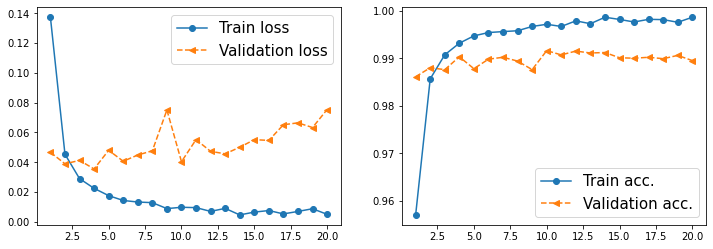

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<',label='Validation acc.')
ax.legend(fontsize=15)
plt.show()

Como você já sabe, avaliar o modelo treinado no conjunto de dados de teste pode ser feito chamando o método .evaluate():

In [ ]:
test_results = model.evaluate(mnist_test.batch(20))
print(f"Test Acc.: {test_results[1]:.2%}")

500/500 [==============================] - 3s 5ms/step - loss: 0.0549 - accuracy: 0.9927
Test Acc.: 99.27%


O modelo CNN atinge uma precisão de **99,27%**. Em outra oportunidade, obtivemos aproximadamente 90% de precisão usando o Estimator `DNNClassifier`.

Finalmente, podemos obter os resultados da previsão na forma de probabilidades de pertinência de classe e convertê-los em rótulos previstos usando a função `tf.argmax` para encontrar o elemento com a probabilidade máxima. Faremos isso para um lote de 12 exemplos e visualizaremos os rótulos de entrada e previstos:

TensorShape([12, 10])
tf.Tensor([2 0 4 8 7 6 0 6 3 1 8 0], shape=(12,), dtype=int64)


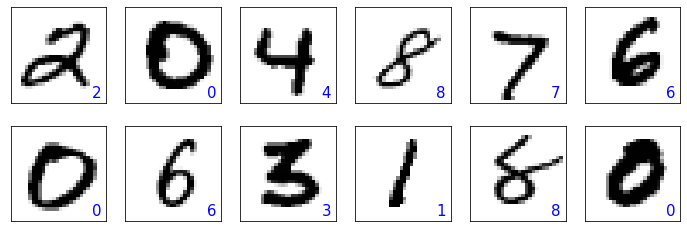

In [ ]:
batch_test = next(iter(mnist_test.batch(12)))

preds = model(batch_test[0])

tf.print(preds.shape)
preds = tf.argmax(preds, axis=1)
print(preds)

fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = batch_test[0][i, :, :, 0]
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9, 0.1, '{}'.format(preds[i]), 
            size=15, color='blue',
            horizontalalignment='center',
            verticalalignment='center', 
            transform=ax.transAxes)
 
plt.show()

### Classificação de gênero a partir de imagens de rosto usando uma CNN

Nesta seção, vamos implementar uma CNN para classificação de gênero a partir de imagens de rosto usando o conjunto de dados **CelebA**. O conjunto de dados CelebA contém 202.599 imagens de rostos de celebridades. Além disso, 40 atributos faciais binários estão disponíveis para cada imagem, incluindo sexo (masculino ou feminino) e idade (jovem ou velho).

Com base no que você aprendeu até agora, o objetivo desta seção é construir e treinar um modelo CNN para prever o atributo de gênero dessas imagens de rosto. Aqui, para simplificar, usaremos apenas uma pequena parte dos dados de treinamento (16.000 exemplos de treinamento) para acelerar o processo de treinamento. No entanto, para melhorar o desempenho da generalização e reduzir o *overfitting* em um conjunto de dados tão pequeno, usaremos uma técnica chamada aumento de dados.

A figura acima mostra as entradas manuscritas e seus rótulos previstos. No caso desse conjunto de exemplos plotados, todos os rótulos previstos estão corretos.

Então, ao invés de usar todos os dados de treinamento e validação disponíveis, vamos pegar um subconjunto de 160.000 exemplos de treinamento e 20.000 exemplos para validação, aproximadamente, como segue:

In [77]:
import tensorflow as tf
import pathlib
path = r"C:\Users\willi\tensorflow_datasets\celeba"
data_dir = pathlib.Path(path)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.2, subset='training', seed=123)
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, validation_split=0.1, subset='validation', seed=123)

Found 202599 files belonging to 1 classes.
Using 162080 files for training.
Found 202599 files belonging to 1 classes.
Using 20259 files for validation.


### Transformação de imagem e aumento de dados
O aumento de dados resume um amplo conjunto de técnicas para lidar com casos em que os dados de treinamento são limitados. Por exemplo, certas técnicas de aumento de dados nos permitem modificar ou até mesmo sintetizar artificialmente mais dados e, assim, aumentar o desempenho de uma máquina ou modelo de aprendizado profundo, reduzindo o *overfitting*.

Embora o aumento de dados não seja apenas para dados de imagem, há um conjunto de transformações aplicáveis ​​exclusivamente a dados de imagem, como cortar partes de uma imagem, inverter, alterar o contraste, o brilho e a saturação. Vamos ver algumas dessas transformações que estão disponíveis através do módulo `tf.image`.

No bloco de código a seguir, primeiro obteremos cinco exemplos do conjunto de dados `celeba_train` e aplicaremos cinco tipos diferentes de transformação:

1. Cortar uma imagem em uma caixa delimitadora;
2. Inverter uma imagem horizontalmente;
3. Ajustar o contraste;
4. Ajustar o brilho; e 
5. Recorte centralizado de uma imagem e redimensione a imagem resultante de volta ao seu tamanho original (218, 178).

No código a seguir, visualizaremos os resultados dessas transformações, mostrando cada uma em uma coluna separada para comparação:

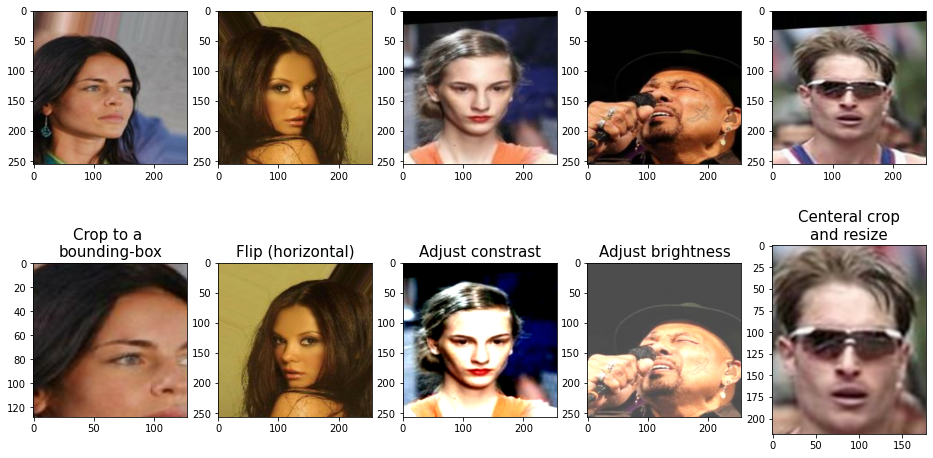

In [78]:
import matplotlib.pyplot as plt

examples = []
for images, labels in train_ds.take(1):
  for i in range(5):
    examples.append(images[i].numpy().astype('uint8'))

fig = plt.figure(figsize=(16, 8.5))

## Column 1: cropping to a bounding-box
ax = fig.add_subplot(2, 5, 1)
ax.imshow(examples[0])
ax = fig.add_subplot(2, 5, 6)
ax.set_title('Crop to a \nbounding-box', size=15)
img_cropped = tf.image.crop_to_bounding_box(
    examples[0], 50, 20, 128, 128)
ax.imshow(img_cropped)

## Column 2: flipping (horizontally)
ax = fig.add_subplot(2, 5, 2)
ax.imshow(examples[1])
ax = fig.add_subplot(2, 5, 7)
ax.set_title('Flip (horizontal)', size=15)
img_flipped = tf.image.flip_left_right(examples[1])
ax.imshow(img_flipped)

## Column 3: adjust contrast
ax = fig.add_subplot(2, 5, 3)
ax.imshow(examples[2])
ax = fig.add_subplot(2, 5, 8)
ax.set_title('Adjust constrast', size=15)
img_adj_contrast = tf.image.adjust_contrast(
    examples[2], contrast_factor=2)
ax.imshow(img_adj_contrast)

## Column 4: adjust brightness
ax = fig.add_subplot(2, 5, 4)
ax.imshow(examples[3])
ax = fig.add_subplot(2, 5, 9)
ax.set_title('Adjust brightness', size=15)
img_adj_brightness = tf.image.adjust_brightness(
    examples[3], delta=0.3)
ax.imshow(img_adj_brightness)

## Column 5: cropping from image center 
ax = fig.add_subplot(2, 5, 5)
ax.imshow(examples[4])
ax = fig.add_subplot(2, 5, 10)
ax.set_title('Centeral crop\nand resize', size=15)
img_center_crop = tf.image.central_crop(
    examples[4], 0.7)
img_resized = tf.image.resize(
    img_center_crop, size=(218, 178))
ax.imshow(img_resized.numpy().astype('uint8'))
plt.show()


Na figura anterior, as imagens originais são mostradas na primeira linha e sua versão transformada na segunda linha. Observe que para a primeira transformação (coluna mais à esquerda), a caixa delimitadora é especificada por quatro números: a coordenada do canto superior esquerdo da caixa delimitadora (aqui x=20, y=50) e a largura e a altura da caixa (largura=128, altura=128). Observe também que a origem (as coordenadas no local indicado como (0, 0)) para imagens carregadas pelo TensorFlow (assim como outros pacotes como `imageio`) é o canto superior esquerdo da imagem.

As transformações no bloco de código anterior são determinísticas. No entanto, todas essas transformações também podem ser randomizadas, o que é recomendado para aumento de dados durante o treinamento do modelo. Por exemplo, uma caixa delimitadora aleatória (onde as coordenadas do canto superior esquerdo são selecionadas aleatoriamente) pode ser cortada de uma imagem, uma imagem pode ser invertida aleatoriamente ao longo dos eixos horizontal ou vertical com uma probabilidade de 0,5 ou o contraste de uma imagem pode ser alterada aleatoriamente, onde o `contraste_factor` é selecionado aleatoriamente, mas com distribuição uniforme, a partir de um intervalo de valores. Além disso, podemos criar um pipeline dessas transformações.

Por exemplo, podemos primeiro cortar aleatoriamente uma imagem, depois virá-la aleatoriamente e, finalmente, redimensioná-la para o tamanho desejado. O código é o seguinte (como temos elementos aleatórios, definimos a semente aleatória para reprodutibilidade):

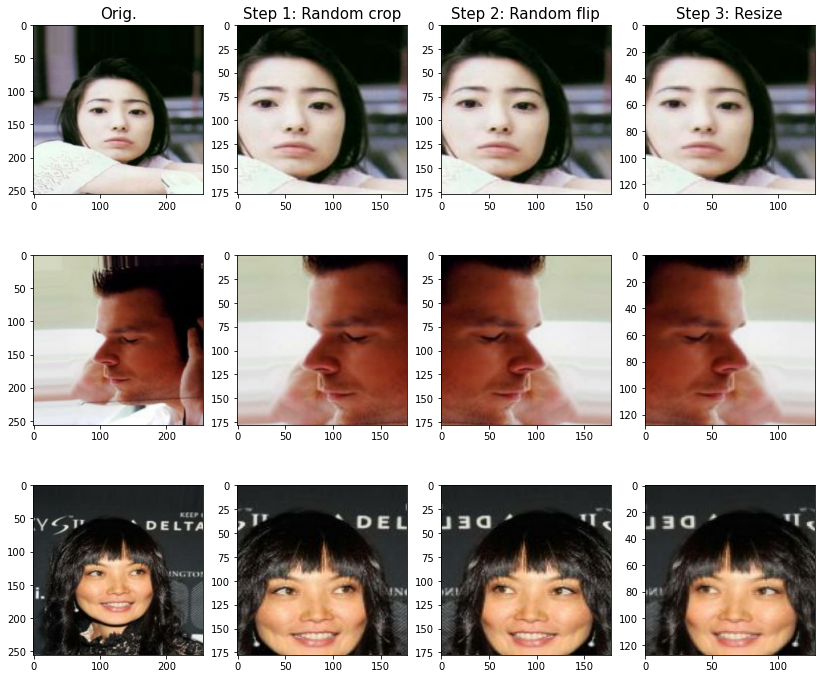

In [79]:
tf.random.set_seed(1)

fig = plt.figure(figsize=(14, 12))

for images, labels in train_ds.take(1):
  for i in range(3):
    image = images[i].numpy().astype('uint8')

    ax = fig.add_subplot(3, 4, i*4+1)
    ax.imshow(image)
    if i == 0:
        ax.set_title('Orig.', size=15)

    ax = fig.add_subplot(3, 4, i*4+2)
    img_crop = tf.image.random_crop(image, size=(178, 178, 3))
    ax.imshow(img_crop)
    if i == 0:
        ax.set_title('Step 1: Random crop', size=15)

    ax = fig.add_subplot(3, 4, i*4+3)
    img_flip = tf.image.random_flip_left_right(img_crop)
    ax.imshow(tf.cast(img_flip, tf.uint8))
    if i == 0:
        ax.set_title('Step 2: Random flip', size=15)

    ax = fig.add_subplot(3, 4, i*4+4)
    img_resize = tf.image.resize(img_flip, size=(128, 128))
    ax.imshow(tf.cast(img_resize, tf.uint8))
    if i == 0:
        ax.set_title('Step 3: Resize', size=15)
plt.show()

Observe que cada vez que iteramos esses três exemplos, obtemos imagens ligeiramente diferentes devido a transformações aleatórias.

Por conveniência, podemos definir uma função *wrapper* para usar esse *pipeline* para aumento de dados durante o treinamento do modelo. No código a seguir, definiremos a função `preprocess()`, que receberá um dicionário contendo as chaves `'image'` e `'attributes'`. A função retornará uma tupla contendo a imagem transformada e o rótulo extraído do dicionário de atributos.

No entanto, aplicaremos o aumento de dados apenas aos exemplos de treinamento, e não às imagens de validação ou teste. O código é o seguinte: